In [1]:
# calculate the climatology for SST in daily resolution

import numpy as np
import pandas as pd



In [ ]:
def climatologyForSST(data_path, save_path):
    # load data
    data = pd.read_csv(data_path)
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    data = data.resample('D').mean()
    data = data.dropna()
    # calculate climatology
    climatology = data.groupby(data.index.dayofyear).mean()
    climatology.to_csv(save_path)



In [32]:
def climatologyForSSTin30years(data_path, save_path):
    # load data
    data = pd.read_csv(data_path)
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    indexOfStart = np.where(data.index == '1969-01-01')
    sst = data['sst']
    # calculate climatology
    for i in range(indexOfStart[0][0], len(data)):
        temp = data.iloc[:i]
        temp = temp.groupby(temp.index.dayofyear).mean()
        print(temp)
        sst[i] = temp['sst'][data.index[i]]
    climatology = data.groupby(data.index.dayofyear)
    # print(climatology)
    climatology = climatology.rolling(window=30).mean()
    climatology.to_csv(save_path)

data_path = './dataset/nan_lat_20.0_lon_118.0.csv'
save_path = './dataset/climatology.csv'
climatologyForSSTin30years(data_path, save_path)


             sst
date            
1     297.043293
2     297.011005
3     296.967121
4     296.915589
5     296.864883
...          ...
362   297.206496
363   297.170507
364   297.142299
365   297.118774
366   297.057946

[366 rows x 1 columns]


KeyError: Timestamp('1969-01-01 00:00:00')

In [71]:
data_path = './dataset/nan_lat_20.0_lon_118.0.csv'
save_path = './dataset/climatology.csv'
data = pd.read_csv(data_path)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
climatology = data.groupby(data.index.dayofyear)
means = pd.DataFrame()
for name, group in climatology:
    # print(name)
    # print(group)
    # group.plot()
    # print(group.rolling(window=30).mean()[29:])
    # group.rolling(window=30).mean().plot()
    means = pd.concat([means, group.rolling(window=30).mean()[29:]])
    
# climatologys = pd.concat([data.iloc[:10593], means])
# climatologys.sort_index()
# sort by year month day
# means.index = pd.to_datetime(means.index, format='%Y-%m-%d')
means.sort_index(inplace=True)
means = pd.concat([data.iloc[:10593], means])
means.to_csv(save_path)
# indexOfStart = np.where(data.index == '1969-01-01')
# sst = data['sst']
# # calculate climatology
# for i in range(indexOfStart[0][0], len(data)):
#     temp = data.iloc[:i]
#     temp = temp.groupby(temp.index.dayofyear).mean()
#     print(temp)
#     sst[i] = temp['sst'][data.index[i]]
# climatology = data.groupby(data.index.dayofyear)
# # print(climatology)
# climatology = climatology.rolling(window=30).mean()
# climatology.to_csv(save_path)


<Axes: xlabel='date'>

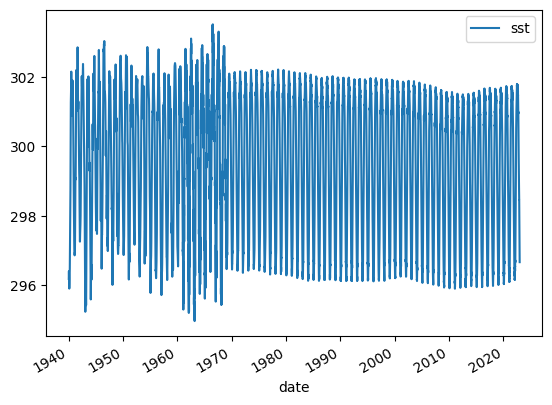

In [72]:
means.plot()

<Axes: xlabel='date'>

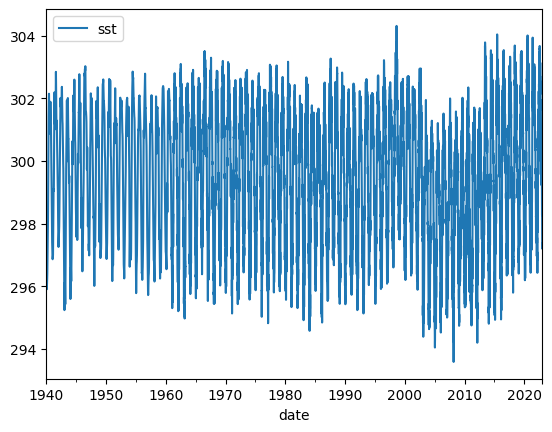

In [73]:
data.plot()

climatology for ./dataset/multivariate\climatology_lat_14.0_lon_112.0.csv is done!
climatology for ./dataset/multivariate\climatology_lat_14.0_lon_118.0.csv is done!
climatology for ./dataset/multivariate\climatology_lat_20.0_lon_112.0.csv is done!
climatology for ./dataset/multivariate\climatology_lat_20.0_lon_118.0.csv is done!
climatology for ./dataset/multivariate\lat_14.0_lon_112.0.csv is done!
climatology for ./dataset/multivariate\lat_14.0_lon_118.0.csv is done!
climatology for ./dataset/multivariate\lat_20.0_lon_112.0.csv is done!
climatology for ./dataset/multivariate\lat_20.0_lon_118.0.csv is done!


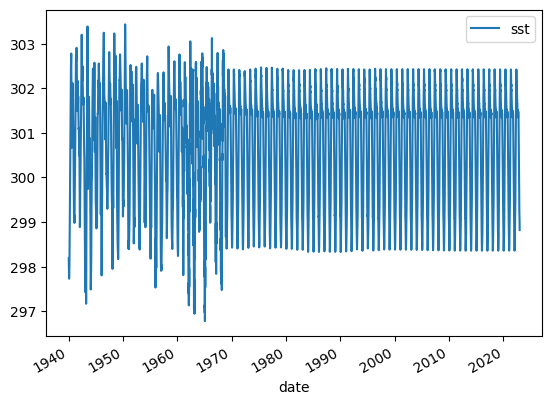

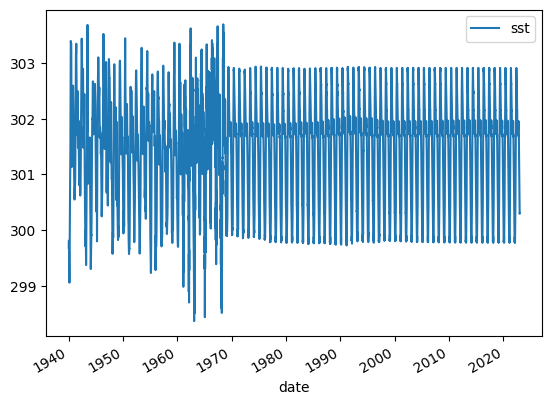

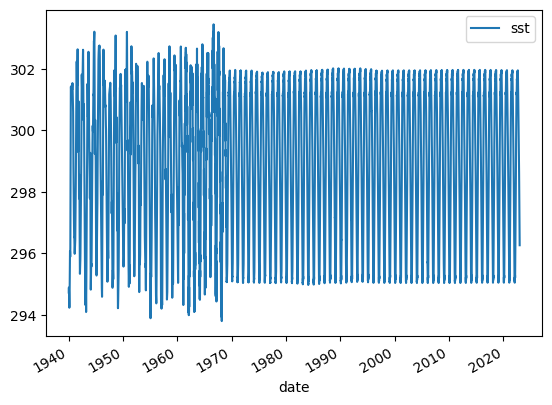

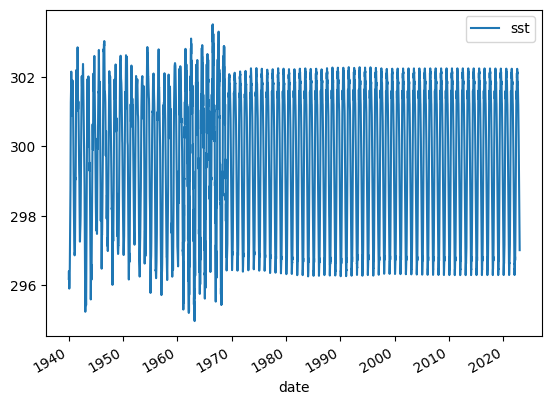

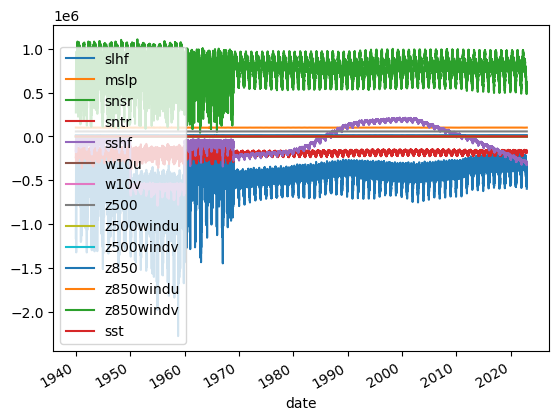

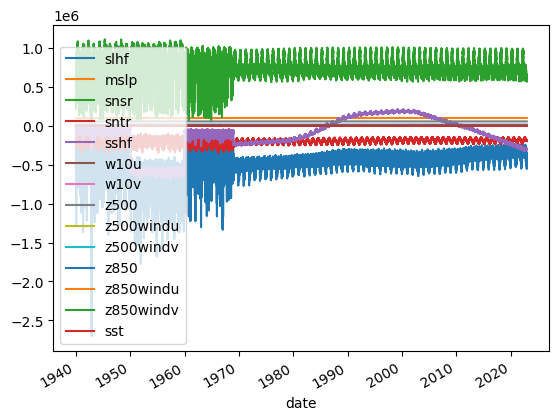

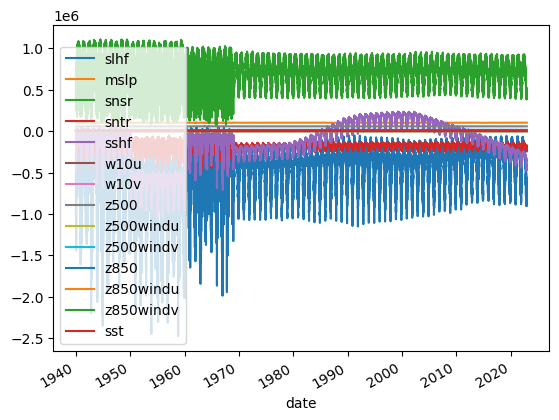

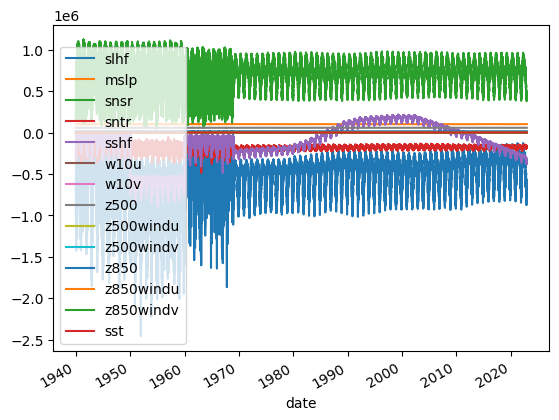

: 

In [83]:
def climatologyForSST(data_path, save_path):
    # load data
    data = pd.read_csv(data_path)
    data_copy = data.copy()
    # data_copy = data_copy[['date'] + ['sst']]
    data_copy['date'] = pd.to_datetime(data_copy['date'])
    data_copy = data_copy.set_index('date')
    # calculate climatology
    climatology = data_copy.groupby(data_copy.index.dayofyear)
    means = pd.DataFrame()
    for name, group in climatology:
        means = pd.concat([means, group.rolling(window=30).mean()[29:]])
    means = means.sort_index()
    means = pd.concat([data_copy.iloc[:10593], means])
    means.plot()
    means.to_csv(save_path)

import glob
import os

# read all files in the folder
folder_path = './dataset/multivariate/'
files = glob.glob(os.path.join(folder_path, '*.csv'))
for file in files:
    save_path = file.replace('\\lat_', '\\climatology_lat_')
    climatologyForSST(file, save_path)
    print('climatology for ' + file + ' is done!')